In [1]:
from dynamic import DynamicModel
from beam import GetCompletions
import tensorflow as tf
from AMSGrad import AMSGrad

In [2]:
m = DynamicModel(
    '/s0/ajaech/aolexps/g25', 
    learning_rate=1.0,
    optimizer=AMSGrad)

INFO:tensorflow:Restoring parameters from /s0/ajaech/aolexps/g25/model.bin


In [3]:
m.session.run(m.reset_user_embed)

In [4]:
prefix = 'ba'
b = GetCompletions(['<S>'] + list(prefix), 0, m, branching_factor=4, beam_size=100)
for item in list(b)[-10:]:
    print item
m.Train(['<S>'] + list('espn') + ['</S>'])
m.Train(['<S>'] + list('sports news') + ['</S>'])
m.Train(['<S>'] + list('nascar') + ['</S>'])
m.Train(['<S>'] + list('yankees') + ['</S>'])
m.Train(['<S>'] + list('nba') + ['</S>'])

beam 5.419: <S>baby names</S>
beam 5.417: <S>ballys</S>
beam 5.372: <S>bankof america</S>
beam 5.289: <S>barbie.com</S>
beam 5.125: <S>barnes</S>
beam 5.068: <S>barbie</S>
beam 4.771: <S>barnes and noble</S>
beam 4.276: <S>bankofamerica.com</S>
beam 3.937: <S>bank of america</S>
beam 3.861: <S>bankofamerica</S>


(2.1615884, 4.0)

In [5]:
beam 5.897: <S>bank america</S>
beam 5.599: <S>bankof america</S>
beam 5.585: <S>bankatlantic</S>
beam 5.405: <S>bank one</S>
beam 5.399: <S>bankamerica</S>
beam 5.276: <S>bangbros</S>
beam 4.304: <S>banks</S>
beam 1.909: <S>bankone</S>
beam 1.651: <S>bankofamerica</S>
beam 1.563: <S>bank of america</S>

SyntaxError: invalid syntax (<ipython-input-5-50dcdf0dbf7d>, line 1)

In [5]:
prefix = 'directions to '
b = GetCompletions(['<S>'] + list(prefix), 0, m, branching_factor=4, beam_size=100)
for item in list(b)[-10:]:
    print item
m.Train(['<S>'] + list('key west') + ['</S>'])
m.Train(['<S>'] + list('tampa') + ['</S>'])
m.Train(['<S>'] + list('orlando') + ['</S>'])
m.Train(['<S>'] + list('miami') + ['</S>'])

beam 6.295: <S>directions to nudel</S>
beam 6.273: <S>directions to nurses</S>
beam 6.091: <S>directions to nudes</S>
beam 6.070: <S>directions to nudels</S>
beam 5.976: <S>directions to estate</S>
beam 5.962: <S>directions to nyunes</S>
beam 5.703: <S>directions to online</S>
beam 5.300: <S>directions to nyun</S>
beam 4.537: <S>directions to espn</S>
beam 4.349: <S>directions to nj</S>


(2.5313702, 6.0)

In [6]:
import numpy as np
import pandas
from dataset import Dataset, LoadData
from matplotlib import pyplot


In [7]:
df = LoadData(['/s0/ajaech/topqueries.tsv.gz'])
dataset = Dataset(df, m.char_vocab, m.user_vocab, max_len=m.params.max_len)
    
def GetLosses():
    dataset.current_idx = 0
    rows = []
    for i in range(62):
        feed_dict = dataset.GetFeedDict(m.model)
        feed_dict[m.model.user_ids] *= 0

        losses = m.session.run(m.model.per_sentence_loss, feed_dict)
        queries = feed_dict[m.model.queries]
        batch_lengths = feed_dict[m.model.query_lengths]
        for j in range(24):
            q_len = batch_lengths[j]
            q = ''.join([m.char_vocab[int(c)] for c in queries[j]])
            rows.append({'query_': q, 'cost': losses[j]})
    return pandas.DataFrame(rows)

df.head()

,user,query_,date,hourofday,dayofweek
0,s324240,"[<S>, ', h, t, t, p, </S>]",2006-04-29 05:42:58,5,5
1,s19588,"[<S>, ., </S>]",2006-03-31 19:11:36,19,4
2,s74891,"[<S>, ., c, i, t, y, s, e, a, r, c, h, ., c, o...",2006-04-22 20:12:07,20,5
3,s2334,"[<S>, ., c, o, m, </S>]",2006-03-14 19:21:27,19,1
4,s8763,"[<S>, ., c, o, m, h, t, t, p, </S>]",2006-03-07 10:21:23,10,1


In [55]:
m = DynamicModel(
    '/s0/ajaech/aolexps/g26', 
    learning_rate=0.03,
    optimizer=AMSGrad)

INFO:tensorflow:Restoring parameters from /s0/ajaech/aolexps/g26/model.bin


In [63]:
m.session.run(m.reset_user_embed)

In [57]:
baseline_losses = GetLosses()

In [64]:
#m.Train(['<S>'] + list('gucci bracelet') + ['</S>'])
#m.Train(['<S>'] + list('prada handbags') + ['</S>'])
#m.Train(['<S>'] + list('versace eyewear') + ['</S>'])

m.Train(['<S>'] + list('discount flights') + ['</S>'])
m.Train(['<S>'] + list('yellowstone vacation packages') + ['</S>'])


(0.63681334, 30.0)

In [65]:
test_losses = GetLosses()

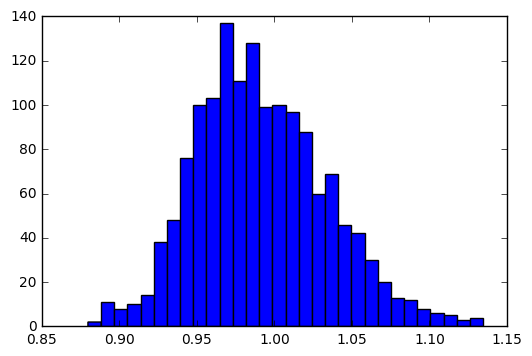

In [66]:
ratio = test_losses.cost / baseline_losses.cost
pyplot.hist(ratio, 30)
pyplot.show()

In [67]:
for i in np.argsort(ratio)[:20]:
    print ratio[i], ''.join(dataset.df.iloc[i].query_)

0.879680154903 <S>jet blue</S>
0.888052891653 <S>yahoo games</S>
0.890462076044 <S>jetblue</S>
0.890700144696 <S>yahoo personals</S>
0.891198078731 <S>yahoo maps</S>
0.891822309748 <S>yahoo finance</S>
0.892341946332 <S>yahoo email</S>
0.893838479299 <S>expedia</S>
0.894251975267 <S>citizens bank</S>
0.894758331429 <S>federal express</S>
0.895323902936 <S>hotels</S>
0.895332527859 <S>national city bank</S>
0.895405223901 <S>cheap tickets</S>
0.898045238801 <S>national weather service</S>
0.899292405795 <S>national car rental</S>
0.899602773803 <S>travelocity</S>
0.900522551649 <S>airtran</S>
0.901032785327 <S>orbitz</S>
0.901489767906 <S>priceline</S>
0.901781452639 <S>capital one</S>


In [68]:
for i in np.argsort(ratio)[-20:]:
    print ratio[i], ''.join(dataset.df.iloc[i].query_)

1.09836804014 <S>.myspace.com</S>
1.09868957822 <S>www.google.cm</S>
1.10328871768 <S>www.goo</S>
1.10348163465 <S>myspacecom</S>
1.10351473722 <S>www.google.com</S>
1.1048180145 <S>www.mysapce.com</S>
1.10699107953 <S>googl.com</S>
1.10763209414 <S>www.mys</S>
1.11249772772 <S>myspace.comhttp</S>
1.11265421358 <S>.comhttp</S>
1.11429055707 <S>myspace.cm</S>
1.11449110375 <S>www.myspace.co</S>
1.11544578479 <S>google.co</S>
1.12055314865 <S>www.googl.com</S>
1.12366336069 <S>mysapce.com</S>
1.1242895956 <S>myspace.com</S>
1.12738025062 <S>www.google.co</S>
1.12891379654 <S>my</S>
1.13021235457 <S>myspace.co</S>
1.13465349596 <S>mys</S>


In [368]:
df = pandas.read_csv('/g/ssli/data/LowResourceLM/aol/queries01.train.txt.gz',
                     compression='gzip', header=None, sep='\t')
df.columns = ['user', 'query_', 'time']
top_queries = set(df.query_.value_counts()[1:1501].index.values)

df['indicator'] = df.query_.isin(top_queries)

subset = df[df.indicator].groupby('query_').agg('first')
del subset['indicator']
subset.reset_index()[['user', 'query_', 'time']].to_csv(
    '/s0/ajaech/topqueries.tsv.gz', compression='gzip', sep='\t', 
    header=None, index=None)